In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime, timedelta
import math

In [2]:
reddit_summary = pd.read_csv("Data.csv")
reddit_summary.head()

,Date,Upvotes,Flair,CB1,CB2,CB3,Ronaldo_Posts,Ronaldo_Comments,Others_Post,Player_Names
0,3/11/2020,11200,Media,Player Highlight,Neutral,Off-Topic,No,No,Yes,Luisinho
1,10/15/2020,3100,No Flair,Transfer Rumour,Neutral,Discussive,No,No,No,NaN
2,6/27/2022,131,News,Team Related,Positive,Celebratory,No,No,No,NaN
3,12/30/2022,575,News,Mocking the League,Negative,Mocking,Yes,Yes,No,NaN
4,1/22/2023,2000,News,"Team Related, Player Related",Neutral,Mocking,Yes,Yes,No,NaN


In [3]:
cmap = ['#0d0887', '#2a0593', '#41049d', '#5601a4', '#6a00a8',
        '#7e03a8', '#8f0da4', '#a11b9b', '#b12a90', '#bf3984',
        '#cc4778', '#d6556d', '#e16462', '#ea7457', '#f2844b',
        '#f89540', '#fca636', '#feba2c', '#fcce25', '#f7e425']

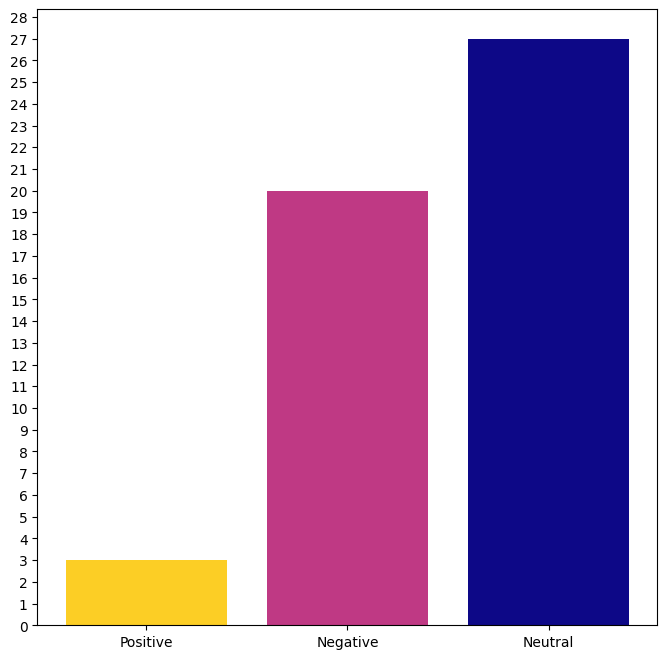

In [4]:
sentiments = dict(Counter(reddit_summary['CB2']))
count, sentiment = zip(*sorted(zip(sentiments.values(), sentiments.keys())))
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(sentiment, count, color=['#fcce25', '#bf3984', '#0d0887'])
plt.yticks(np.arange(0, max(count)+2, 1))
plt.show()

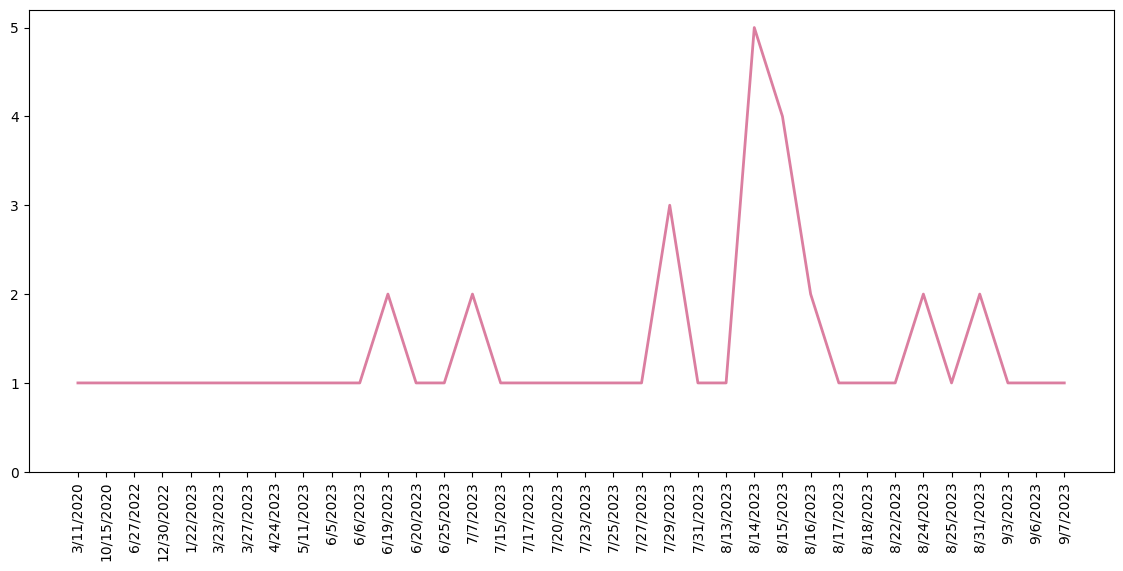

In [5]:
post_dates = dict(Counter(reddit_summary['Date']))
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(post_dates.keys(), post_dates.values(), color = cmap[10], linewidth=2, alpha=0.7)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(post_dates.values())+1, 1))
plt.show()

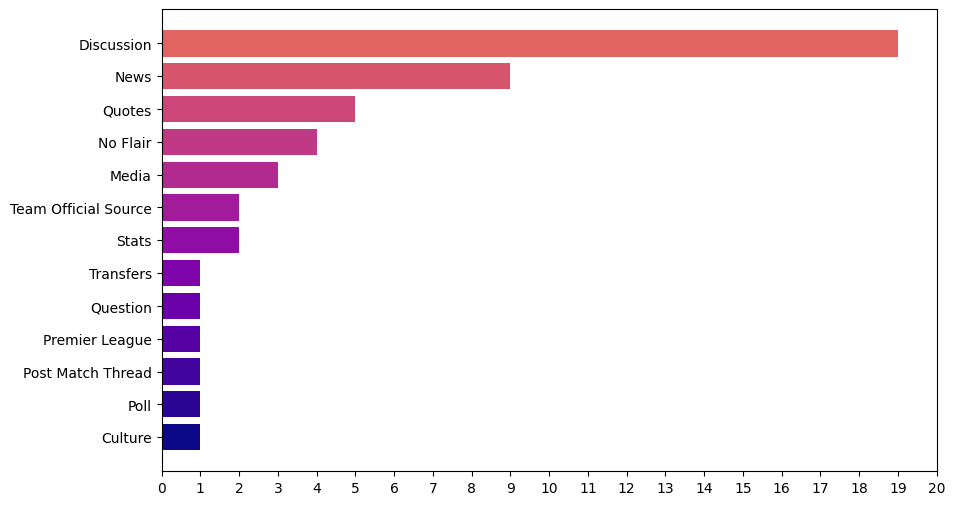

In [6]:
flairs = dict(Counter(reddit_summary['Flair']))
count, flair = zip(*sorted(zip(flairs.values(), flairs.keys())))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(flair, count, color=cmap[:len(flair)])
plt.xticks(np.arange(0, max(count)+2, 1))
plt.show()

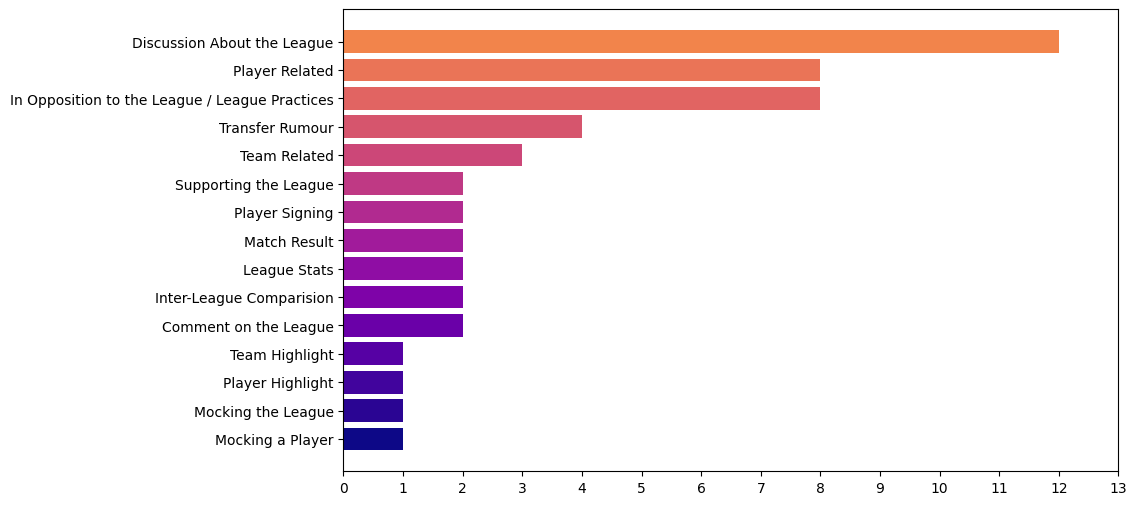

In [7]:
post_types = []
for l in reddit_summary['CB1']:
    if pd.isna(l):
        continue
    t = str.split(l, ",")
    for i in t:
        post_types.append(i.strip())

posts = dict(Counter(post_types))
count, post = zip(*sorted(zip(posts.values(), posts.keys())))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(post, count, color=cmap[:len(post)])
plt.xticks(np.arange(0, max(count)+2, 1))
plt.show()

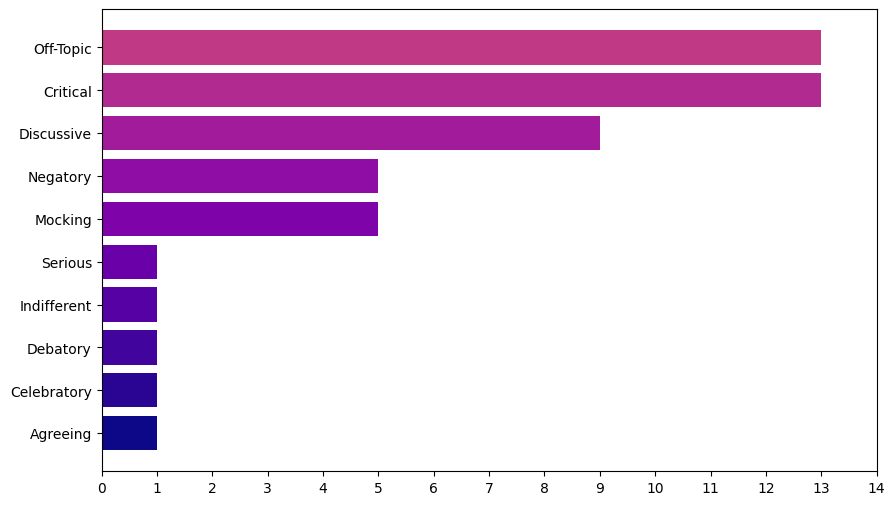

In [8]:
comments = dict(Counter(reddit_summary['CB3']))
count, comment = zip(*sorted(zip(comments.values(), comments.keys())))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(comment, count, color=cmap[:len(comment)])
plt.xticks(np.arange(0, max(count)+2, 1))
plt.show()

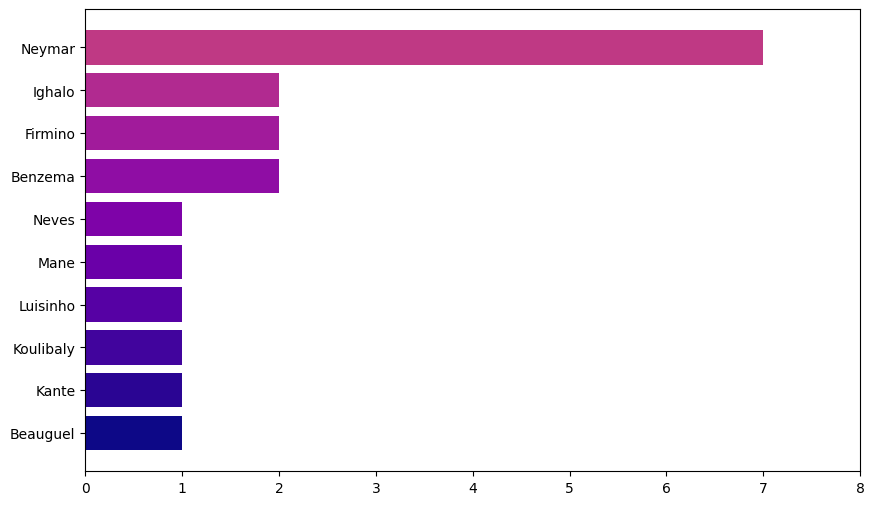

In [9]:
player_names = []
for l in reddit_summary['Player_Names']:
    if pd.isna(l):
        continue
    player_names.append(str.split(l, " "))
player_names = [item.replace(" ", "").replace(",", "") for sublist in player_names for item in sublist]

other_players = dict(Counter(player_names))
count, player = zip(*sorted(zip(other_players.values(), other_players.keys())))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(player, count, color=cmap[:len(player)])
plt.xticks(np.arange(0, max(count)+2, 1))
plt.show()

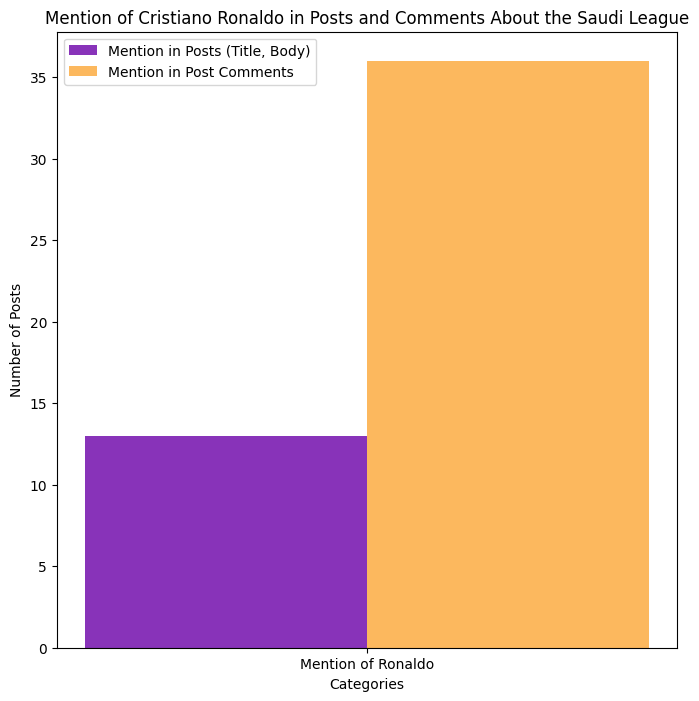

In [10]:
crp = dict(Counter(reddit_summary['Ronaldo_Posts']))
crc = dict(Counter(reddit_summary['Ronaldo_Comments']))
crc, crp

x = np.arange(len(crc)-1)
bar_width = 0.2
fig, ax = plt.subplots(figsize=(8, 8))
bar1 = ax.bar(x - bar_width/2, list(crp.values())[1], bar_width, label='Mention in Posts (Title, Body)', color=cmap[4], alpha = 0.8)
bar1 = ax.bar(x + bar_width/2, list(crc.values())[1], bar_width, label='Mention in Post Comments', color=cmap[16], alpha = 0.8)
ax.set_xticks(x)
ax.set_xticklabels(['Mention of Ronaldo'])
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Posts')
ax.set_title('Mention of Cristiano Ronaldo in Posts and Comments About the Saudi League')
ax.legend()
plt.show()